1. Data preprocessing - There are various tasks that need to perform in data processing like lowercasing, removing stop words, removing digits, removing URLs, HTML tags and many more.
2. Lemmatisation - grouping together the inflected forms of a word so they can be analysed as a single item
3. Analyzing text statistics - Text statistics are simple but very insightful techniques. They include word frequency analysis, sentence length analysis, average word length analysis, etc.
4. Sentiment analysis - Sentiment analysis is a very common natural language processing task in which we determine if the text is positive, negative or neutral. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/AllProductReviews.csv")
df

ReviewTitle  \
0                 Honest review of an edm music lover\n   
1                 Unreliable earphones with high cost\n   
2                            Really good and durable.\n   
3                     stopped working in just 14 days\n   
4      Just Awesome Wireless Headphone under 1000...😉\n   
...                                                 ...   
14332                                            Good\n   
14333                                 Amazing Product\n   
14334                                         Not bad\n   
14335                                  a good product\n   
14336           Average headphones , n overrated name\n   

                                              ReviewBody  ReviewStar  \
0      No doubt it has a great bass and to a great ex...           3   
1      This  earphones are unreliable, i bought it be...           1   
2      i bought itfor 999,I purchased it second time,...           4   
3      Its sound quality is adorable. overall it was ...           1   
4      Its Awesome... Good sound quality & 8-9 hrs ba...           5   
...                                                  ...         ...   
14332                                             Good\n           4   
14333             An amazing product but a bit costly.\n           5   
14334                                            Sound\n           1   
14335  the sound is good battery life is good but the...           5   
14336  M writing this review after using for almost 7...           1   

                Product  
0      boAt Rockerz 255  
1      boAt Rockerz 255  
2      boAt Rockerz 255  
3      boAt Rockerz 255  
4      boAt Rockerz 255  
...                 ...  
14332        JBL T110BT  
14333        JBL T110BT  
14334        JBL T110BT  
14335        JBL T110BT  
14336        JBL T110BT  

[14337 rows x 4 columns]

In [ ]:
len(df)

14337

In [ ]:
df["Product"].value_counts()

boAt Rockerz 255         5000
Sennheiser CX 6.0BT      5000
JBL T110BT               1922
JBL T205BT               1411
PTron Intunes             254
Skullcandy S2PGHW-174     239
Samsung EO-BG950CBEIN     224
Flybot Wave               182
Flybot Boom                82
Flybot Beat                23
Name: Product, dtype: int64

In [ ]:
#checking for null values
df.isnull().sum()

ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
dtype: int64

In [ ]:
#converting to string type
df['ReviewBody']=df['ReviewBody'].astype(str)
df['ReviewTitle']=df['ReviewTitle'].astype(str)

In [ ]:
#converting to lower case
df['ReviewBody']=df['ReviewBody'].apply(lambda x: x.lower() )
df['ReviewBody']

0        no doubt it has a great bass and to a great ex...
1        this  earphones are unreliable, i bought it be...
2        i bought itfor 999,i purchased it second time,...
3        its sound quality is adorable. overall it was ...
4        its awesome... good sound quality & 8-9 hrs ba...
                               ...                        
14332                                               good\n
14333               an amazing product but a bit costly.\n
14334                                              sound\n
14335    the sound is good battery life is good but the...
14336    m writing this review after using for almost 7...
Name: ReviewBody, Length: 14337, dtype: object

In [ ]:
df['ReviewTitle']=df['ReviewTitle'].apply(lambda x: x.lower() )
df['ReviewTitle']

0                   honest review of an edm music lover\n
1                   unreliable earphones with high cost\n
2                              really good and durable.\n
3                       stopped working in just 14 days\n
4        just awesome wireless headphone under 1000...😉\n
                               ...                       
14332                                              good\n
14333                                   amazing product\n
14334                                           not bad\n
14335                                    a good product\n
14336             average headphones , n overrated name\n
Name: ReviewTitle, Length: 14337, dtype: object

In [ ]:
#removing every characters except letters
df['ReviewBody'] = df['ReviewBody'].str.replace('[^A-Za-z ]+', '',regex=True)
df['ReviewTitle'] = df['ReviewTitle'].str.replace('[^A-Za-z ]+', '',regex=True)
df['ReviewTitle']

0           honest review of an edm music lover
1           unreliable earphones with high cost
2                       really good and durable
3                 stopped working in just  days
4        just awesome wireless headphone under 
                          ...                  
14332                                      good
14333                           amazing product
14334                                   not bad
14335                            a good product
14336      average headphones  n overrated name
Name: ReviewTitle, Length: 14337, dtype: object

In [ ]:
# Removing Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['ReviewTitle'] = df['ReviewTitle'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['ReviewBody']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        doubt great bass great extent noise cancellati...
1        earphones unreliable bought days meanwhile rig...
2        bought itfor purchased second time gifted firs...
3        sound quality adorable overall good weeks stop...
4        awesome good sound quality hrs battery life wa...
                               ...                        
14332                                                 good
14333                           amazing product bit costly
14334                                                sound
14335    sound good battery life good wire long good pr...
14336    writing review using almost months stopped wor...
Name: ReviewBody, Length: 14337, dtype: object

In [ ]:
#Removing single characters if any
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 1]))
df['ReviewTitle'] = df['ReviewTitle'].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 1]))
df['ReviewBody']

0        doubt great bass great extent noise cancellati...
1        earphones unreliable bought days meanwhile rig...
2        bought itfor purchased second time gifted firs...
3        sound quality adorable overall good weeks stop...
4        awesome good sound quality hrs battery life wa...
                               ...                        
14332                                                 good
14333                           amazing product bit costly
14334                                                sound
14335    sound good battery life good wire long good pr...
14336    writing review using almost months stopped wor...
Name: ReviewBody, Length: 14337, dtype: object

In [ ]:
#removing rare words
freq1 = pd.Series(' '.join(df['ReviewBody']).split()).value_counts()
freq2 = pd.Series(' '.join(df['ReviewTitle']).split()).value_counts()
lowfreq1 = list(freq1[freq1 ==1].index)
lowfreq2 = list(freq2[freq2 ==1].index)
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in lowfreq1))
df['ReviewTitle'] = df['ReviewTitle'].apply(lambda x: " ".join(x for x in x.split() if x not in lowfreq2))
df['ReviewBody']

0        doubt great bass great extent noise cancellati...
1        earphones unreliable bought days meanwhile rig...
2        bought itfor purchased second time gifted firs...
3        sound quality adorable overall good weeks stop...
4        awesome good sound quality hrs battery life lo...
                               ...                        
14332                                                 good
14333                           amazing product bit costly
14334                                                sound
14335    sound good battery life good wire long good pr...
14336    writing review using almost months stopped wor...
Name: ReviewBody, Length: 14337, dtype: object

In [ ]:
import nltk
nltk.download('omw-1.4')
from nltk.stem import 	WordNetLemmatizer
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: " ".join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))
df['ReviewTitle'] = df['ReviewTitle'].apply(lambda x: " ".join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))
df['ReviewBody']
 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0        doubt great bass great extent noise cancellati...
1        earphone unreliable buy day meanwhile right si...
2        buy itfor purchase second time gift first one ...
3        sound quality adorable overall good week stop ...
4        awesome good sound quality hr battery life loo...
                               ...                        
14332                                                 good
14333                            amaze product bite costly
14334                                                sound
14335    sound good battery life good wire long good pr...
14336    write review use almost month stop work mail c...
Name: ReviewBody, Length: 14337, dtype: object

In [ ]:
# to group the review according to the products
df_grouped=df[['Product','ReviewTitle','ReviewBody']].groupby(by='Product').agg(lambda x:' '.join(x))
df_grouped.head()

ReviewTitle  \
Product                                                          
Flybot Beat  bass bad quality value money purchase cheap qu...   
Flybot Boom  must buy average average sound quality poor pe...   
Flybot Wave  dont buy sound quality good poor connectivity ...   
JBL T110BT   substandard audio quality good one one star pe...   
JBL T205BT   jbl tbt complete review ergonomic design easy ...   

                                                    ReviewBody  
Product                                                         
Flybot Beat  bass headphone clear sound best call bad quali...  
Flybot Boom  earphone good quality look earphone budget try...  
Flybot Wave  cheap chinese product bass volume slow even hi...  
JBL T110BT   please buy wire earphone worth would give much...  
JBL T205BT   look budget friendly wireless earphone similar...

In [ ]:
#To analyse the sentiment
from textblob import TextBlob
df_grouped['Polarity'] = df_grouped['ReviewBody'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_grouped

ReviewTitle  \
Product                                                                    
Flybot Beat            bass bad quality value money purchase cheap qu...   
Flybot Boom            must buy average average sound quality poor pe...   
Flybot Wave            dont buy sound quality good poor connectivity ...   
JBL T110BT             substandard audio quality good one one star pe...   
JBL T205BT             jbl tbt complete review ergonomic design easy ...   
PTron Intunes          make fool product perfect excellent sound go d...   
Samsung EO-BG950CBEIN  empty box best available option market great p...   
Sennheiser CX 6.0BT    best headphone price  awesome thank great pair...   
Skullcandy S2PGHW-174  understatement one amaze charge last day work ...   
boAt Rockerz 255       honest review edm music lover unreliable earph...   

                                                              ReviewBody  \
Product                                                                    
Flybot Beat            bass headphone clear sound best call bad quali...   
Flybot Boom            earphone good quality look earphone budget try...   
Flybot Wave            cheap chinese product bass volume slow even hi...   
JBL T110BT             please buy wire earphone worth would give much...   
JBL T205BT             look budget friendly wireless earphone similar...   
PTron Intunes          typical let make fool product product make chi...   
Samsung EO-BG950CBEIN  really excite product office receive mail text...   
Sennheiser CX 6.0BT    buy headphone september photo upload august wr...   
Skullcandy S2PGHW-174  skullcandy make affordable quality product dif...   
boAt Rockerz 255       doubt great bass great extent noise cancellati...   

                       Polarity  
Product                          
Flybot Beat            0.473569  
Flybot Boom            0.357651  
Flybot Wave            0.324725  
JBL T110BT             0.242972  
JBL T205BT             0.281897  
PTron Intunes          0.364707  
Samsung EO-BG950CBEIN  0.339687  
Sennheiser CX 6.0BT    0.334190  
Skullcandy S2PGHW-174  0.292117  
boAt Rockerz 255       0.317702

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
data=cv.fit_transform(df_grouped['ReviewBody'])
df_tdm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_tdm.index=df_grouped.index
df_tdm.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ab  abd  ability  able  absence  absent  absolute  absolutely  \
Product                                                                      
Flybot Beat   0    0        0     0        0       0         0           0   
Flybot Boom   0    0        0     0        0       0         0           1   
Flybot Wave   0    0        0     0        0       0         0           1   
JBL T110BT    1    0        0    15        1       0         0           4   
JBL T205BT    0    0        0    16        1       0         2           8   

             abt  abysmal  ...  youll  youre  youthe  youtube  youve  yoyr  \
Product                    ...                                               
Flybot Beat    0        0  ...      0      0       0        0      0     0   
Flybot Boom    0        0  ...      0      0       0        0      0     0   
Flybot Wave    0        0  ...      0      1       0        0      0     0   
JBL T110BT     3        0  ...      1      5       0        5      2     0   
JBL T205BT     0        0  ...      4      7       0        5      1     0   

             yr  zenearphone  zenfone  zero  
Product                                      
Flybot Beat   0            0        0     0  
Flybot Boom   0            0        0     0  
Flybot Wave   1            0        0     0  
JBL T110BT    0            0        0     5  
JBL T205BT    1            0        0     5  

[5 rows x 3975 columns]

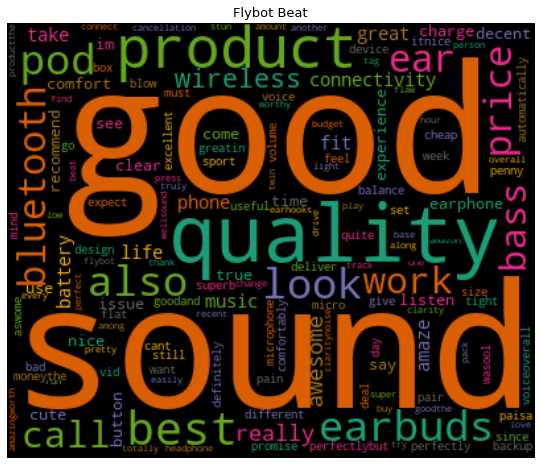

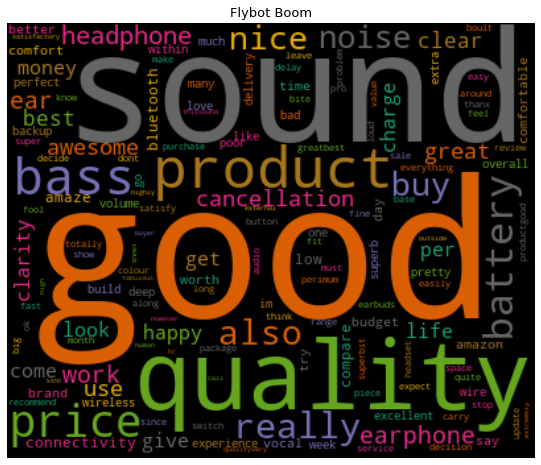

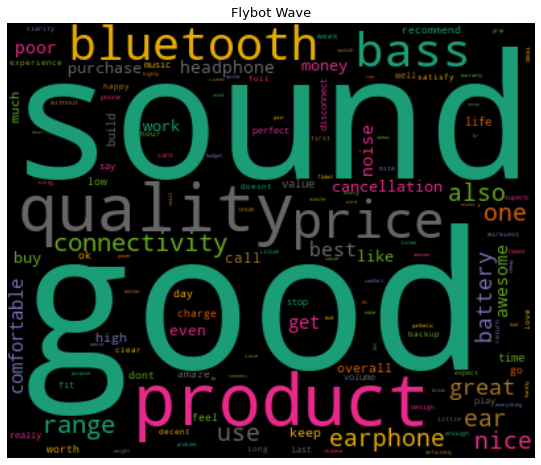

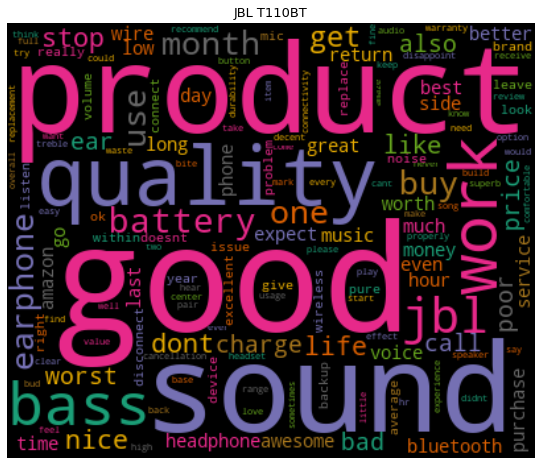

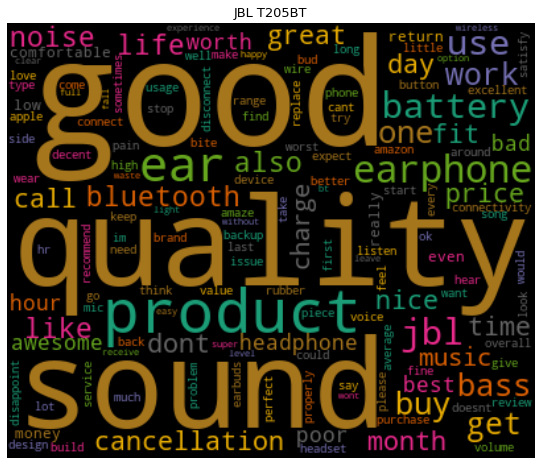

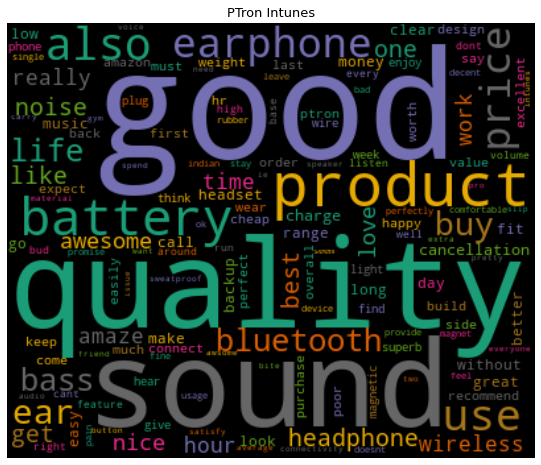

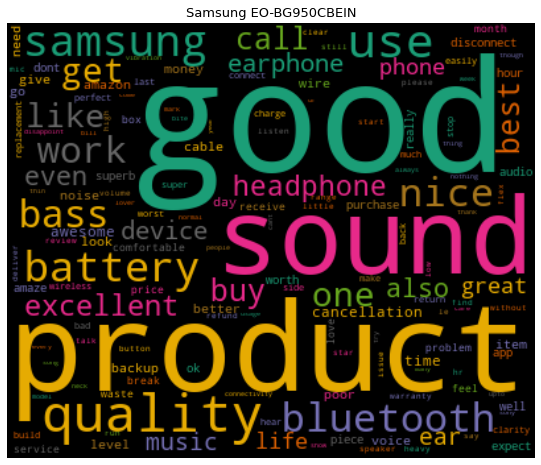

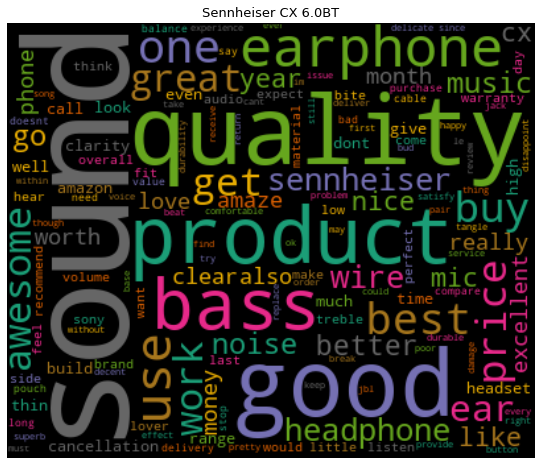

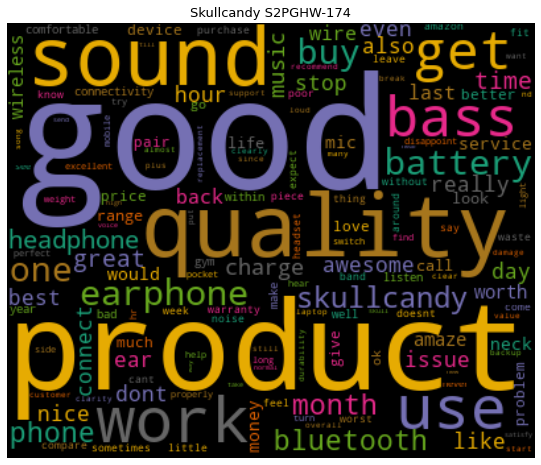

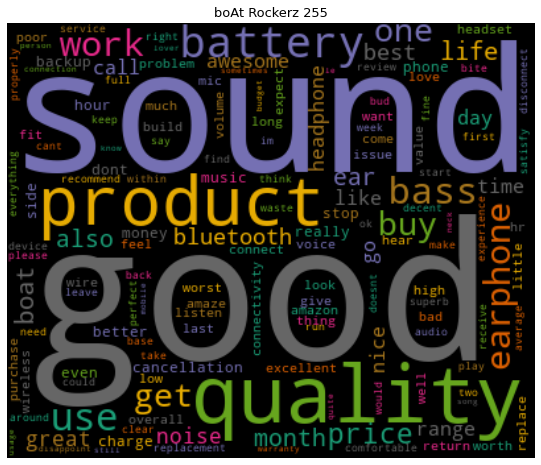

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_tdm=df_tdm.transpose()

# Plotting word cloud for each product
for index,pdt in enumerate(df_tdm.columns):
  generate_wordcloud(df_tdm[pdt].sort_values(ascending=False),pdt)
